[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shin-ta/Python-study/tree/main/もくもく会資料（転移学習、ファインチューニング）.ipynb)

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shin-ta/Python-study/tree/main/もくもく会資料（転移学習、ファインチューニング）.ipynb)

**efficientnetをインストール**

In [ ]:
# ライブラリインポート
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
# CIFAR-10のインポート
cifar10=tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
# ラベルデータをONE-HOTエンコードする
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import layers

# img_augmentation = Sequential(
#     [
#         layers.RandomRotation(factor=0.15),
#         layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
#         layers.RandomFlip(),
#         layers.RandomContrast(factor=0.1),
#     ],
#     name="img_augmentation",
# )

In [ ]:
num_classes = 10
input_shape = (32,32,3)

# Efficientnet
base_input_shape = (224,224,3)
model_class = tf.keras.applications.EfficientNetB0

# MobileNetV2
# base_input_shape = (160,160,3)
# model_class = tf.keras.applications.MobileNetV2

inputs = tf.keras.layers.Input(shape=input_shape)
#Resize
x = tf.keras.layers.Lambda(
    lambda image: tf.image.resize(image, base_input_shape[0:2]),
    output_shape=base_input_shape)(inputs)

#学習済みモデルの組み込み
base_model = model_class(
    include_top=False,
    input_shape=base_input_shape,
    weights='imagenet')

base_model.trainable = False

# trainingをFalseにする
x = base_model(x, training=False)

#トップレイヤーの追加
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(num_classes)(x)
outputs = tf.keras.layers.Activation('softmax')(x)

model = tf.keras.Model(inputs, outputs)


16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [ ]:
# モデルの学習
history = model.fit(X_train, y_train,
                    batch_size=128,         # バッチサイズを128に設定
                    epochs=3,               # エポック数を3に設定
                    verbose=1,              #進捗状況をプログレスバーで表示
                    validation_split=0.1)   # 訓練データの1割を検証データとして扱う

Epoch 1/3
104/352 [=======>......................] - ETA: 47s - loss: 1.7948 - accuracy: 0.4067

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

print("loss:", score[0])
print("accuracy:", score[1])

loss: 0.5396243333816528
accuracy: 0.8425999879837036


In [ ]:
base_model.trainable = True

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [ ]:
# モデルの学習
history = model.fit(X_train, y_train,
                    batch_size=128,         # バッチサイズを128に設定
                    epochs=5,              # エポック数を5に設定
                    verbose=1,              #進捗状況をプログレスバーで表示
                    validation_split=0.1)   # 訓練データの1割を検証データとして扱う

Epoch 1/10
352/352 [==============================] - 349s 915ms/step - loss: 0.3022 - accuracy: 0.9033 - val_loss: 0.1800 - val_accuracy: 0.9394
Epoch 2/10
352/352 [==============================] - 313s 891ms/step - loss: 0.1763 - accuracy: 0.9426 - val_loss: 0.1485 - val_accuracy: 0.9498
Epoch 3/10
352/352 [==============================] - 316s 898ms/step - loss: 0.1371 - accuracy: 0.9546 - val_loss: 0.1368 - val_accuracy: 0.9556
Epoch 4/10
352/352 [==============================] - 316s 898ms/step - loss: 0.1116 - accuracy: 0.9628 - val_loss: 0.1246 - val_accuracy: 0.9564
Epoch 5/10
352/352 [==============================] - 316s 898ms/step - loss: 0.0962 - accuracy: 0.9682 - val_loss: 0.1124 - val_accuracy: 0.9622
Epoch 6/10
352/352 [==============================] - 316s 898ms/step - loss: 0.0798 - accuracy: 0.9734 - val_loss: 0.1228 - val_accuracy: 0.9586
Epoch 7/10
352/352 [==============================] - 316s 899ms/step - loss: 0.0686 - accuracy: 0.9762 - val_loss: 0.1167 -

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

print("loss:", score[0])
print("accuracy:", score[1])

loss: 0.13406910002231598
accuracy: 0.960099995136261


In [ ]:
model.save('/content/drive/MyDrive/ニューラルネットワーク/my_model1.h5')

TypeError: ignored

In [ ]:
# 予測
preds = []
X = X_test
pred = model.predict(X)

313/313 [==============================] - 18s 53ms/step


In [ ]:
# エポックごとの正解率とlossの取得
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# エポック数の取得
epochs = range(len(acc))

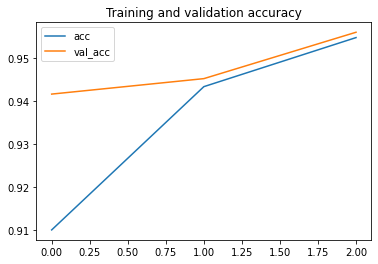

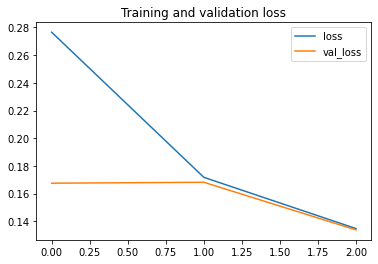

In [ ]:
# 正解率の表示
import matplotlib.pyplot as plt

plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='val_acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# lossの表示
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/ニューラルネットワーク/my_model.h5')

**画像データ（CIFAR-10）の準備**

In [ ]:
# CIFAR-10データセットをダウンロード
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

# 画像を0~1の範囲で正規化
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# 正解ラベルをOne-Hotベクトルに変換
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(x_train.shape, y_train.shape)

170498071/170498071 [==============================] - 17s 0us/step
(50000, 32, 32, 3) (50000, 10)


In [ ]:
import tensorflow as tf

num_classes = 10
input_shape = (32,32,3)
base_input_shape = (224,224,3)
model_class = tf.keras.applications.EfficientNetB0

x = inputs = tf.keras.layers.Input(shape=input_shape)
#Resize
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, base_input_shape[0:2]), output_shape=base_input_shape)(x)
#学習済みモデルの組み込み
base_model = model_class(include_top=False, input_shape=base_input_shape,
weights='imagenet')
base_model.trainable = False
x = base_model(x, training=False)  # trainingをFalseにする
#トップレイヤーの追加
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(num_classes)(x)
outputs = tf.keras.layers.Activation('softmax')(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train)

1563/1563 [==============================] - 102s 57ms/step - loss: 2.3327 - accuracy: 0.0969


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print("loss:", score[0])
print("accuracy:", score[1])

loss: 2.3046374320983887
accuracy: 0.10000000149011612


**モデルの構築**

In [ ]:
#モデルのインスタンス化
model = Sequential()

# 入力層（畳み込み_1）
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 中間層（畳み込み_2）
model.add(Conv2D(32,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 中間層（プーリング_1）
model.add(MaxPool2D(pool_size=(2,2)))

# 中間層（畳み込み_3）
model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 中間層（畳み込み_4）
model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 中間層（プーリング_2）
model.add(MaxPool2D(pool_size=(2,2)))

# 特徴量マップを1次元配列に変換
model.add(Flatten())

# 中間層（全結合）
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 出力層（全結合）
model.add(Dense(10,activation='softmax'))

In [ ]:
# モデルのコンパイル
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#モデルの表示
model.summary()

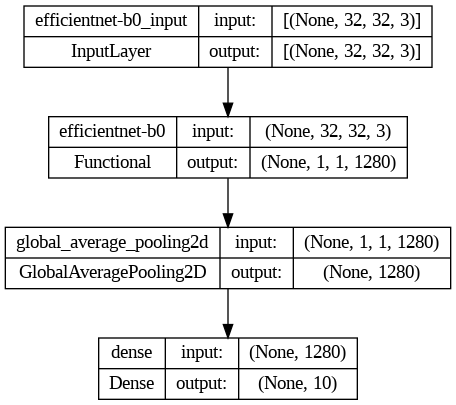

In [ ]:
# モデルを可視化
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png', show_shapes=True)

**モデルの学習**

In [ ]:
# モデルの学習
history = model.fit(x_train,y_train,
                    batch_size=128, # バッチサイズを128に設定
                    epochs=10, # エポック数を10に設定
                    verbose=1, #進捗状況をプログレスバーで表示
                    validation_split=0.1) # 訓練データの1割を検証データとして扱う

Epoch 1/10
352/352 [==============================] - 19s 16ms/step - loss: 1.7893 - accuracy: 0.3738 - val_loss: 2.2087 - val_accuracy: 0.2536
Epoch 2/10
352/352 [==============================] - 5s 15ms/step - loss: 1.2919 - accuracy: 0.5301 - val_loss: 1.1170 - val_accuracy: 0.5892
Epoch 3/10
352/352 [==============================] - 6s 16ms/step - loss: 1.1010 - accuracy: 0.6075 - val_loss: 0.9897 - val_accuracy: 0.6682
Epoch 4/10
352/352 [==============================] - 5s 15ms/step - loss: 0.9939 - accuracy: 0.6480 - val_loss: 0.8284 - val_accuracy: 0.7070
Epoch 5/10
352/352 [==============================] - 5s 14ms/step - loss: 0.9038 - accuracy: 0.6818 - val_loss: 1.1053 - val_accuracy: 0.6180
Epoch 6/10
352/352 [==============================] - 5s 15ms/step - loss: 0.8471 - accuracy: 0.7026 - val_loss: 0.9292 - val_accuracy: 0.6752
Epoch 7/10
352/352 [==============================] - 5s 15ms/step - loss: 0.8018 - accuracy: 0.7186 - val_loss: 0.8582 - val_accuracy: 0.707

**モデルの評価**

In [ ]:
# エポックごとの正解率とlossの取得
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# エポック数の取得
epochs = range(len(acc))

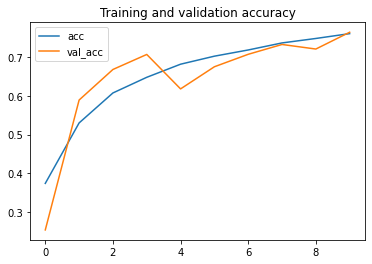

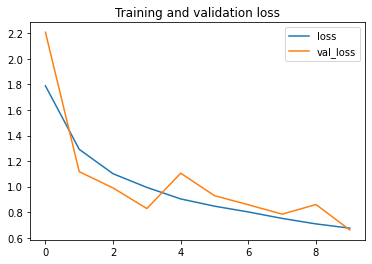

In [ ]:
# 正解率の表示
plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='val_acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# lossの表示
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 評価
loss,acc = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',loss)
print('Test accuracy:',acc)

Test loss: 0.7059717178344727
Test accuracy: 0.7491999864578247


**予測の実行**

In [ ]:
# ラベルをリストに格納
labels =['飛行機', '自動車', '鳥', '猫', '鹿', '犬', '蛙', '馬', '船', 'トラック']

313/313 [==============================] - 1s 2ms/step
この画像は船です


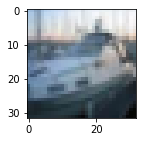

In [ ]:
# 予測を実行
pred = model.predict(x_test).argmax(axis=1)

# 予測結果表示
idx = 2
label = labels[pred[idx]]
print(f'この画像は{label}です')

# 画像を表示
plt.figure(figsize=(2,2))
plt.imshow(x_test[idx])

**WEBから取得した画像で予測（未完成）**

In [ ]:
# ioモジュールのインポート
from skimage import io
from skimage import transform

# 画像の読み込み
image = io.imread('cat.jpg')
# 画像のリサイズ（32ピクセル×32ピクセル）
img = transform.resize(image,output_shape=(32,32,3))
# 画像を0~1の範囲で正規化
img = img.astype('float32')/255.0
img = np.array([img])

# 予測を実行
pred = model.predict(img).argmax(axis=1)

# # 予測結果表示
label = labels[int(pred)]
print(f'この画像は{label}です')

# 画像を表示
plt.figure(figsize=(2,2))
plt.imshow(image)